# 형태학적 변환
이진화한 이미지에서는 같은 값을 가진 픽셀이 이웃하여 있으면 이를 형태학적 영역(morphological region)으로 생각할 수 있다. 이미지의 형태학적 변환(morphological transformation)은 이미지 필터링을 사용하여 영역을 변화시키는 방법이다.

변환에 적용할 커널은 getStructuringElement 함수로 생성한다.

getStructuringElement(shape, ksize)
- shape: 커널 모양
    - cv2.MORPH_RECT
    - cv2.MORPH_ELLIPSE
    - cv2.TMORPH_CROSS
- ksize: 커널 크기

In [1]:
import cv2

In [2]:
cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [3]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [4]:
cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

### 침식 기법
침식 기법은 각 픽셀에 커널을 적용하여 커널 영역 내의 최솟값으로 해당 픽셀을 대체한다. 이진화된 이미지에서는 0인 영역이 증가한다.  

OpenCV에서는 erode함수로 구현되어 있다.

erode(src, kernel)
- src: 원본 이미지
- kernel: 커널

다음 코드는 이미지를 여러 커널 모양을 이용하여 침식 기법으로 변환한다. 검은색이 0인 영역, 흰색이 1인 영역이다. 검은색(0)이 흰색을 침식해 들어가는 것을 알 수 있다.

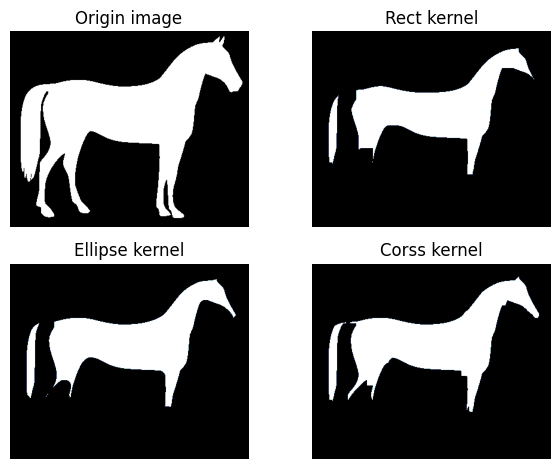

In [7]:
from skimage.data import horse
import numpy as np
import matplotlib.pyplot as plt

img = horse().astype("uint8")
img = np.ones(img.shape) - img

ksize = (20, 20)
kernel = {}
kernel[0] = cv2.getStructuringElement(cv2.MORPH_RECT, ksize)
kernel[1] = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize)
kernel[2] = cv2.getStructuringElement(cv2.MORPH_CROSS, ksize)
title = ["Rect kernel", "Ellipse kernel", "Corss kernel"]

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Origin image")
plt.axis("off")

for i in range(3):
    erosion = cv2.erode(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(erosion, cmap="bone")
    plt.title(title[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

### 팽창
팽창(Dilation)은 침식과 반대로 커널 영역내의 최댓값으로 해당 픽셀을 대체하는 것이다. OpenCV에서는 dilate 함수로 구현되어 있다.  

dilate(src, kernel)
- src: 원본 이미지
- kernel: 커널

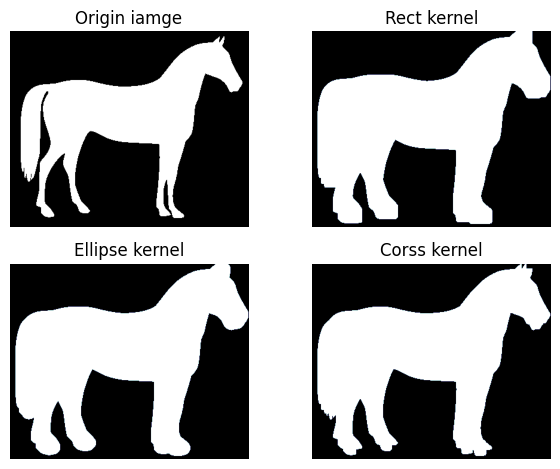

In [8]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Origin iamge")
plt.axis("off")
for i in range(3):
    dilation = cv2.dilate(img, kernel[i])
    plt.subplot(2, 2, i+2)
    plt.imshow(dilation, cmap="bone")
    plt.title(title[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

### 그레디언트, 오프닝, 클로징
그레디언트는 팽창으로 확장시킨 영역에서 침식으로 축소시킨 영역을 빼서 윤곽선을 파악하는 것이다.  

이와 유사한 기법으로 오프닝(Opening)과 클로징(Closing)이 있다. 오프닝은 침식을 적용한 뒤 팽창을 적용하는 것으로 영역이 점점 둥글게 되므로 점 잡음, 작은 물제, 돌기 등을 제거하는데 적합하다. 클로징은 반대로 팽창을 적용한 뒤 침식을 적용하여 영역이 붙기 때문에 전체적인 윤곽을 파악하는데 적합하다.  

그레디언트를 구하려면 OpenCV의 morphologyEx 라는 함수를 사용한다.  

morphologyEx(src, op, kernel)
- src: 원본 이미지
- op:
    - cv2.MORPH_OPEN: cv2.dilate(cv2.erode(image))
    - cv2.MORPH_CLOSE: cv2.erode(cv2.dilate(image))
    - cv2.MORPH_GRADIENT: cv2.dilate(image) - cv2.erode(image)
    - cv2.MORPH_TOPHAT: image - opening(image)
    - cv2.MORPH_BLACKHAT: image - closing(image)
- kernel

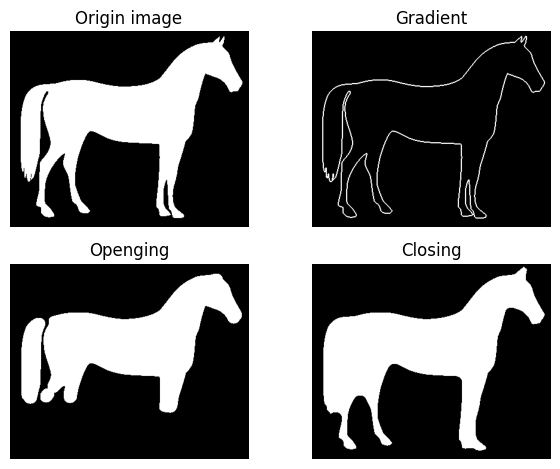

In [11]:
opening = cv2.morphologyEx(
    src=img,
    op=cv2.MORPH_OPEN, 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

closing = cv2.morphologyEx(
    src=img,
    op=cv2.MORPH_CLOSE, 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
)

gradient = cv2.morphologyEx(
    src=img,
    op=cv2.MORPH_GRADIENT, 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

images = [img, gradient, opening, closing]
titles = ["Origin image", "Gradient", "Openging", "Closing"]

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
    
plt.tight_layout()
plt.show()